In [1]:
# Importing Required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the Data
df = pd.read_excel('Doctor_consultation/Final_Train.xlsx')
df.shape

(5961, 7)

In [143]:
# Loading the Test Data
df_test = pd.read_excel('Doctor_consultation/Final_Test.xlsx')
df_test.shape

(1987, 6)

In [7]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [116]:
df.describe()

,Fees,years_experience,ratings_new
count,5961.000000,5961.000000,5961.000000
mean,307.944640,17.303976,94.643475
std,190.920373,11.142798,5.244204
min,5.000000,0.000000,7.000000
25%,150.000000,9.000000,94.643475
50%,300.000000,14.000000,94.643475
75%,500.000000,23.000000,96.000000
max,950.000000,66.000000,100.000000


In [16]:
info_list = list(df['Miscellaneous_Info'].astype(str))

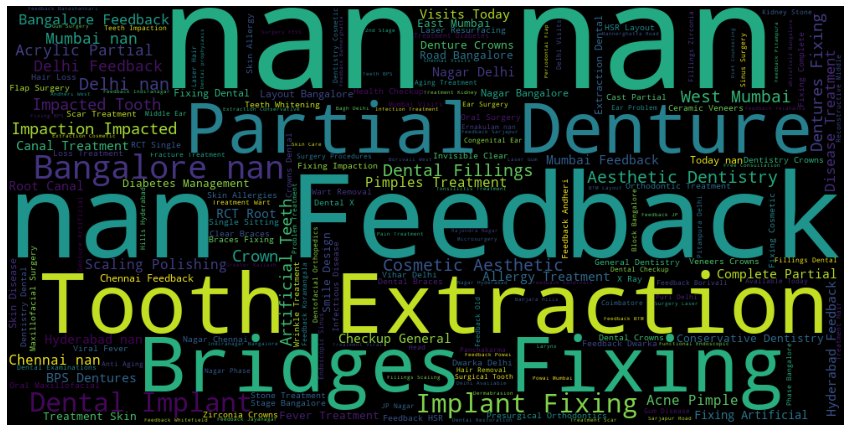

In [19]:
#convert list to string and generate
unique_string=(" ").join(info_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

Showing the most common terms in the Miscellaneous Info 

In [21]:
df.isnull().sum()   # Null Values Count

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [25]:
df.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


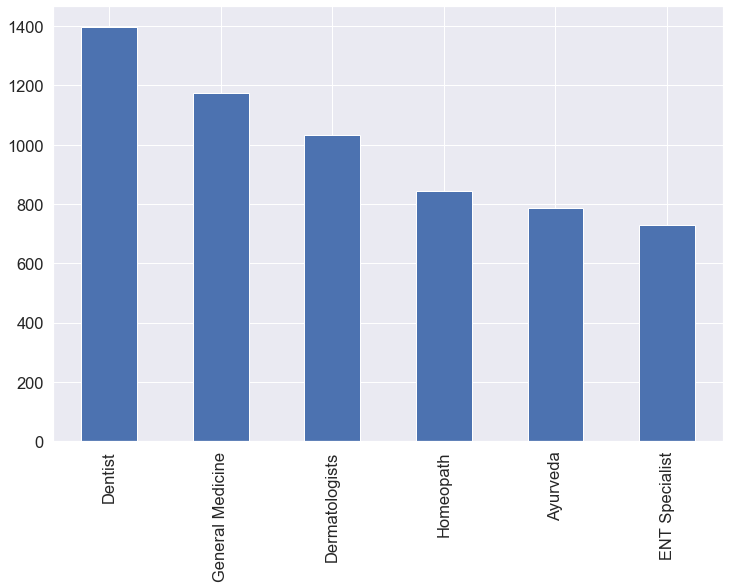

In [27]:
# Plotting the counts Profile-wise
sns.set(font_scale=1.5) 
plt.figure(figsize=(12,8))
df.Profile.value_counts().plot(kind = 'bar')
print(df.Profile.value_counts())

In [28]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [29]:
experience  = list(df.Experience)

In [32]:
# Extracting the numbers from Experience column
years = list(map(lambda sub:int(''.join([ele for ele in sub if ele.isnumeric()])), experience)) 

In [33]:
df['years_experience'] = years

In [41]:
ratings = list(df.Rating)

In [42]:
ratings

['100%',
 '98%',
 nan,
 nan,
 '100%',
 nan,
 nan,
 '99%',
 nan,
 nan,
 nan,
 nan,
 '98%',
 nan,
 nan,
 nan,
 nan,
 nan,
 '79%',
 '100%',
 '100%',
 nan,
 nan,
 nan,
 nan,
 nan,
 '100%',
 '95%',
 nan,
 '97%',
 '97%',
 nan,
 '94%',
 '88%',
 nan,
 '100%',
 nan,
 '90%',
 '80%',
 nan,
 '100%',
 '100%',
 '100%',
 nan,
 '99%',
 nan,
 '100%',
 nan,
 '93%',
 nan,
 nan,
 nan,
 nan,
 '100%',
 '100%',
 '36%',
 '100%',
 '97%',
 nan,
 '99%',
 nan,
 '99%',
 '98%',
 nan,
 nan,
 '100%',
 '100%',
 '78%',
 nan,
 '99%',
 '93%',
 nan,
 nan,
 nan,
 '87%',
 '93%',
 nan,
 '98%',
 '97%',
 nan,
 nan,
 nan,
 nan,
 '99%',
 '100%',
 nan,
 '99%',
 nan,
 '94%',
 nan,
 nan,
 nan,
 nan,
 '100%',
 '100%',
 '100%',
 '97%',
 nan,
 nan,
 '98%',
 nan,
 '100%',
 '99%',
 '100%',
 '98%',
 nan,
 '90%',
 nan,
 '100%',
 nan,
 nan,
 '96%',
 '90%',
 '100%',
 '100%',
 nan,
 nan,
 '95%',
 nan,
 nan,
 nan,
 nan,
 nan,
 '82%',
 nan,
 '95%',
 nan,
 '100%',
 nan,
 nan,
 '90%',
 nan,
 '98%',
 '100%',
 nan,
 nan,
 nan,
 '89%',
 '89%',
 '10

In [50]:
# Stripping the % symbol
ratings_new = []
for i in ratings:
    if type(i) == str:
        k = float(i.strip('%'))
    else:
        k = i
    ratings_new.append(k)

In [51]:
ratings_new

[100.0,
 98.0,
 nan,
 nan,
 100.0,
 nan,
 nan,
 99.0,
 nan,
 nan,
 nan,
 nan,
 98.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 79.0,
 100.0,
 100.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 100.0,
 95.0,
 nan,
 97.0,
 97.0,
 nan,
 94.0,
 88.0,
 nan,
 100.0,
 nan,
 90.0,
 80.0,
 nan,
 100.0,
 100.0,
 100.0,
 nan,
 99.0,
 nan,
 100.0,
 nan,
 93.0,
 nan,
 nan,
 nan,
 nan,
 100.0,
 100.0,
 36.0,
 100.0,
 97.0,
 nan,
 99.0,
 nan,
 99.0,
 98.0,
 nan,
 nan,
 100.0,
 100.0,
 78.0,
 nan,
 99.0,
 93.0,
 nan,
 nan,
 nan,
 87.0,
 93.0,
 nan,
 98.0,
 97.0,
 nan,
 nan,
 nan,
 nan,
 99.0,
 100.0,
 nan,
 99.0,
 nan,
 94.0,
 nan,
 nan,
 nan,
 nan,
 100.0,
 100.0,
 100.0,
 97.0,
 nan,
 nan,
 98.0,
 nan,
 100.0,
 99.0,
 100.0,
 98.0,
 nan,
 90.0,
 nan,
 100.0,
 nan,
 nan,
 96.0,
 90.0,
 100.0,
 100.0,
 nan,
 nan,
 95.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 82.0,
 nan,
 95.0,
 nan,
 100.0,
 nan,
 nan,
 90.0,
 nan,
 98.0,
 100.0,
 nan,
 nan,
 nan,
 89.0,
 89.0,
 100.0,
 74.0,
 96.0,
 86.0,
 100.0,
 nan,
 100.0,
 89.0,
 nan,
 nan,
 9

In [52]:
df['ratings_new'] = ratings_new

In [56]:
df.ratings_new = df.ratings_new.fillna(df.ratings_new.mean())

In [58]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,years_experience,ratings_new
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,100.000000
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,98.000000
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,94.643475
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,94.643475
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,100.000000


In [90]:
df_ml = df.copy()
test = df_test.copy()

In [91]:
#Dropping unnessary Columns
df_ml = df_ml.drop(['Experience','Rating','Miscellaneous_Info'],axis = 1)

In [92]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [93]:
df_ml.columns[df_ml.dtypes == object]   # All the Categorical variables

Index(['Qualification', 'Place', 'Profile'], dtype='object')

In [96]:
lbl.fit(list(df_ml['Qualification'].astype(str))+list(test['Qualification'].astype(str)))
df_ml['Qualification'] = lbl.transform(df_ml['Qualification'].astype(str))
test['Qualification'] = lbl.transform(test['Qualification'].astype(str))

lbl.fit(list(df_ml['Place'].astype(str))+list(test['Place'].astype(str)))
df_ml['Place'] = lbl.transform(df_ml['Place'].astype(str))
test['Place'] = lbl.transform(test['Place'].astype(str))

lbl.fit(list(df_ml['Profile'].astype(str))+list(test['Profile'].astype(str)))
df_ml['Profile'] = lbl.transform(df_ml['Profile'].astype(str))
test['Profile'] = lbl.transform(test['Profile'].astype(str))

In [97]:
df_ml.head()

,Qualification,Place,Profile,Fees,years_experience,ratings_new
0,757,327,5,100,24,100.000000
1,1121,936,0,350,12,98.000000
2,153,499,3,300,9,94.643475
3,826,74,0,250,12,94.643475
4,2,369,0,250,20,100.000000


In [98]:
df_ml.isnull().any()

Qualification       False
Place               False
Profile             False
Fees                False
years_experience    False
ratings_new         False
dtype: bool

### Same preprocessing required for Test Data also

In [100]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,1661,35 years experience,NaN,219,4,NaN
1,1760,31 years experience,NaN,934,3,NaN
2,1678,40 years experience,70%,316,2,"70% 4 Feedback KK Nagar, Chennai"
3,1426,0 years experience,NaN,579,0,NaN
4,1499,16 years experience,100%,342,1,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,1437,10 years experience,NaN,76,0,NaN
1983,1968,4 years experience,NaN,135,2,NaN
1984,1894,9 years experience,NaN,664,4,NaN
1985,1471,12 years experience,98%,34,1,RCT - Root Canal Treatment Root Canal Treatmen...


In [103]:
exp = list(test.Experience)

In [104]:
test['exp_years'] = list(map(lambda sub:int(''.join([ele for ele in sub if ele.isnumeric()])), exp)) 

In [105]:
ratings = list(test.Rating)
ratings_new = []
for i in ratings:
    if type(i) == str:
        k = float(i.strip('%'))
    else:
        k = i
    ratings_new.append(k)
test['ratings_new'] = ratings_new

In [107]:
test.ratings_new = test.ratings_new.fillna(test.ratings_new.mean())

In [108]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,exp_years,ratings_new
0,1661,35 years experience,NaN,219,4,NaN,35,94.441472
1,1760,31 years experience,NaN,934,3,NaN,31,94.441472
2,1678,40 years experience,70%,316,2,"70% 4 Feedback KK Nagar, Chennai",40,70.000000
3,1426,0 years experience,NaN,579,0,NaN,0,94.441472
4,1499,16 years experience,100%,342,1,General Dentistry Conservative Dentistry Cosme...,16,100.000000
...,...,...,...,...,...,...,...,...
1982,1437,10 years experience,NaN,76,0,NaN,10,94.441472
1983,1968,4 years experience,NaN,135,2,NaN,4,94.441472
1984,1894,9 years experience,NaN,664,4,NaN,9,94.441472
1985,1471,12 years experience,98%,34,1,RCT - Root Canal Treatment Root Canal Treatmen...,12,98.000000


In [109]:
#Dropping unnessary Columns
test = test.drop(['Experience','Rating','Miscellaneous_Info'],axis = 1)

In [110]:
test

,Qualification,Place,Profile,exp_years,ratings_new
0,1661,219,4,35,94.441472
1,1760,934,3,31,94.441472
2,1678,316,2,40,70.000000
3,1426,579,0,0,94.441472
4,1499,342,1,16,100.000000
...,...,...,...,...,...
1982,1437,76,0,10,94.441472
1983,1968,135,2,4,94.441472
1984,1894,664,4,9,94.441472
1985,1471,34,1,12,98.000000


In [112]:
test.isna().any()

Qualification    False
Place            False
Profile          False
exp_years        False
ratings_new      False
dtype: bool

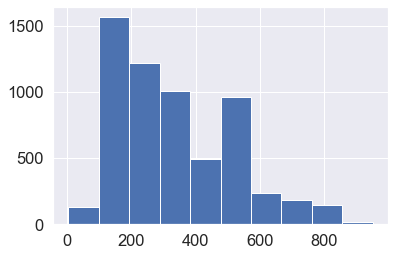

In [142]:
df['Fees'].hist()

The distribution of Fees is right skewed

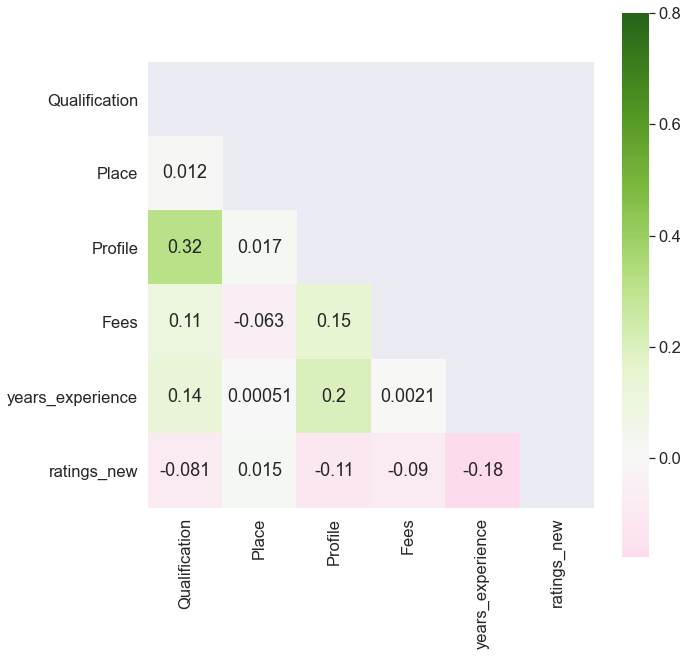

In [113]:
corrmat = df_ml.corr()      # Corelation Matrix
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

There is no strong corelation of any variables with the Fees

### Model Building

In [117]:
df_ml

,Qualification,Place,Profile,Fees,years_experience,ratings_new
0,757,327,5,100,24,100.000000
1,1121,936,0,350,12,98.000000
2,153,499,3,300,9,94.643475
3,826,74,0,250,12,94.643475
4,2,369,0,250,20,100.000000
...,...,...,...,...,...,...
5956,86,76,3,300,19,98.000000
5957,972,589,4,100,33,94.643475
5958,972,234,4,600,41,97.000000
5959,1358,918,4,100,15,90.000000


### Dealing with Outliers

In [128]:
from scipy import stats
z = np.abs(stats.zscore(df_ml))
print(z)

[[2.18934137e-01 4.48707572e-01 1.54301587e+00 1.08926083e+00
  6.00978850e-01 1.02150372e+00]
 [1.06750459e+00 1.71295418e+00 1.47289258e+00 2.20295441e-01
  4.76040293e-01 6.40098345e-01]
 [1.18913332e+00 1.61811019e-01 3.36652489e-01 4.16158134e-02
  7.45295079e-01 2.71004821e-15]
 ...
 [7.20150201e-01 7.78813554e-01 9.39834180e-01 1.52985171e+00
  2.12675597e+00 4.49395656e-01]
 [1.62000788e+00 1.64906270e+00 9.39834180e-01 1.08926083e+00
  2.06785507e-01 8.85523167e-01]
 [1.91363665e-01 7.19086709e-01 8.69710893e-01 5.65438323e-01
  2.72823168e-02 1.02150372e+00]]


In [129]:
threshold = 3
print(np.where(z > 3))

(array([  55,   67,  105,  110,  140,  178,  183,  209,  275,  293,  309,
        325,  333,  372,  377,  458,  465,  585,  590,  632,  692,  731,
        787,  788,  815,  901,  911,  918,  968,  979,  987,  990,  998,
       1009, 1018, 1111, 1170, 1240, 1303, 1314, 1392, 1425, 1433, 1444,
       1475, 1594, 1614, 1631, 1648, 1717, 1741, 1747, 1778, 1796, 1852,
       1860, 1877, 1981, 2023, 2062, 2089, 2161, 2165, 2202, 2252, 2262,
       2277, 2281, 2309, 2323, 2391, 2393, 2428, 2478, 2500, 2522, 2548,
       2585, 2623, 2631, 2646, 2670, 2708, 2715, 2726, 2738, 2758, 2829,
       2833, 2962, 2991, 3093, 3120, 3126, 3144, 3180, 3222, 3254, 3270,
       3333, 3365, 3367, 3463, 3478, 3493, 3526, 3537, 3593, 3604, 3608,
       3615, 3627, 3661, 3676, 3766, 3783, 3820, 3861, 3942, 3960, 4040,
       4055, 4058, 4135, 4167, 4174, 4212, 4212, 4219, 4257, 4344, 4459,
       4474, 4478, 4509, 4581, 4608, 4609, 4612, 4730, 4763, 4775, 4808,
       4825, 4835, 4843, 4851, 4880, 4971, 5028, 5

In [130]:
print('Before removing Outliers, Shape of Dataset:', df_ml.shape)
df_ml = df_ml[(z < 3).all(axis=1)]

Before removing Outliers, Shape of Dataset: (5961, 6)


In [131]:
print('After removing Outliers, Shape of Dataset:', df_ml.shape)

After removing Outliers, Shape of Dataset: (5780, 6)


### Model Building

In [132]:
X = df_ml.drop('Fees',axis = 1).values    # Attributes

In [133]:
y = df_ml['Fees'].values     # The target variable

In [134]:
# Splitting into training and Test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [135]:
# Importing some regression models and performance metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [136]:
# Models taken for Regression 
model_list = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]  

In [137]:
#Building Function for Model Testing
def reg_function(model_list):
    for model in model_list:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        print('Model Name :', model)
        print('MAE:', metrics.mean_absolute_error(y_test, pred))
        print('MSE:', metrics.mean_squared_error(y_test, pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)),'\n')

In [138]:
reg_function(model_list)

Model Name : LinearRegression()
MAE: 150.83504843446917
MSE: 33665.39067203628
RMSE: 183.48130878112974 

Model Name : DecisionTreeRegressor()
MAE: 172.5432525951557
MSE: 54742.173010380626
RMSE: 233.97045328498345 

Model Name : RandomForestRegressor()
MAE: 139.05905771131984
MSE: 31214.080786065748
RMSE: 176.67507120719026 



REGRESSION SCORE : 0.11656597058960605


,Y Test,Pred
0,200,374.0
1,650,346.5
2,250,211.5
3,200,266.0
4,100,380.0


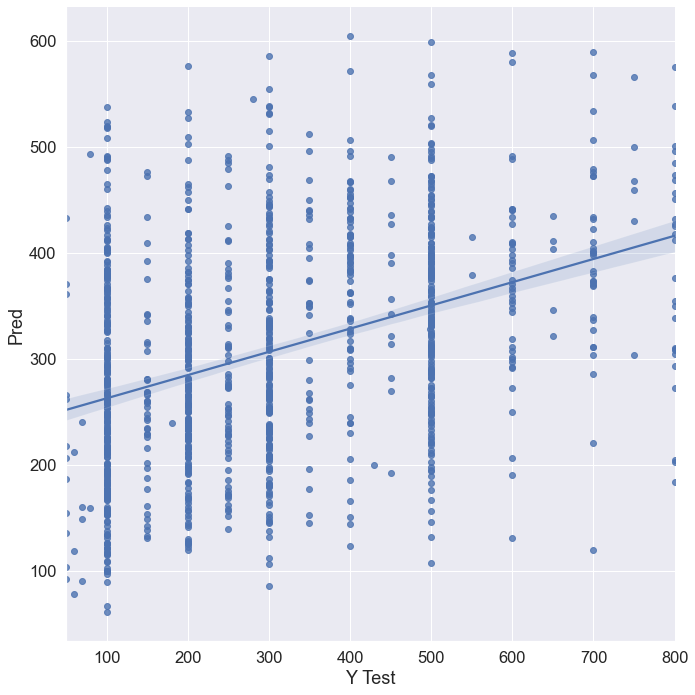

In [141]:
# Plotting Actual values vs Predicted Values for the Final Model
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train,y_train)
pred = RandomForest.predict(X_test)
pred_data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
print("REGRESSION SCORE :",RandomForest.score(X_test,y_test))
sns.lmplot(x='Y Test',y='Pred', data = pred_data, height=10, aspect= 1)
pred_data.head()